# Data Analysis Project Using Python(Zomato)


## Step 1- Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns 

## Step 2- Create the data frame

In [2]:
df = pd.read_csv('Zomato data .csv')

In [3]:
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [4]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Convert the datatype of column - rate 

In [5]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

In [6]:
df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### 1) What type of restaurant do the majority of customer order from ? (Count Plot)

Text(0.5, 0, 'Type of Restaurant')

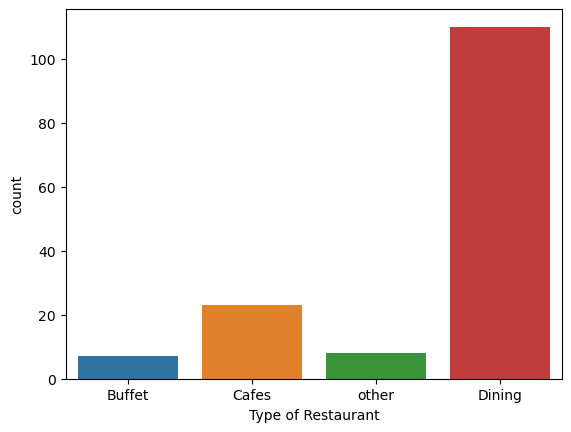

In [8]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

## conclusion - majority of the restaurant falls in dining category

### 2)How many votes has each type of restaurant received from customers ?(LIne Graph)

In [9]:
gd = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': gd})

In [10]:
print(result)

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'Votes')

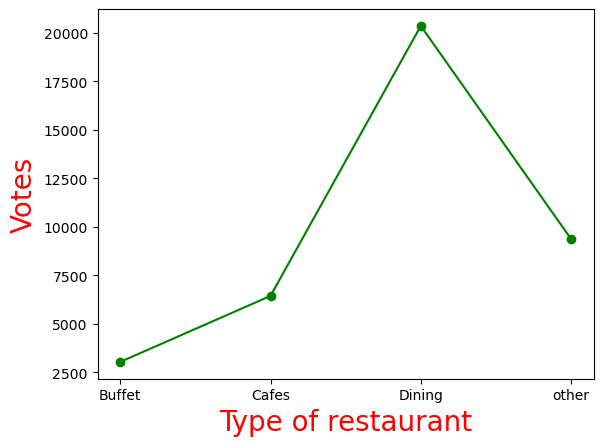

In [11]:
plt.plot(result, c="green" , marker='o')
plt.xlabel("Type of restaurant" , c="red" , size=20)
plt.ylabel("Votes" , c="red" , size=20)

## conclusion - dining restaurants has received maximium votes

### 3) What are the ratings that majority of restaurants have received?(Histogram plot)

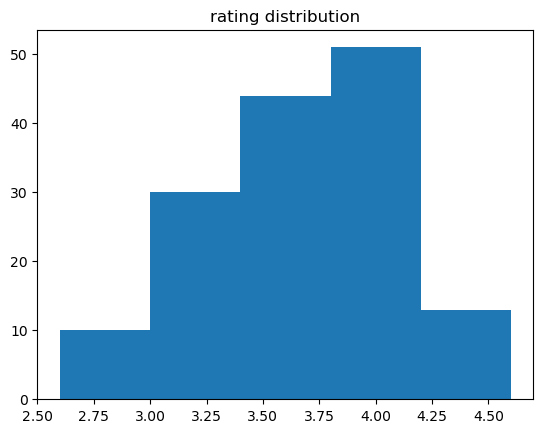

In [12]:
plt.hist(df['rate'], bins=5)
plt.title("rating distribution")
plt.show()

## conclusion - The majority restaurants received rating from 3.5 to 4

### 4)Zomato has observed that most couple order most of their food online. What is the average spending on each order?(Bar Graph)

In [13]:
CD = df['approx_cost(for two people)']
print(CD)

0      800
1      800
2      800
3      300
4      600
      ... 
143    100
144    150
145    450
146    800
147    200
Name: approx_cost(for two people), Length: 148, dtype: int64


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

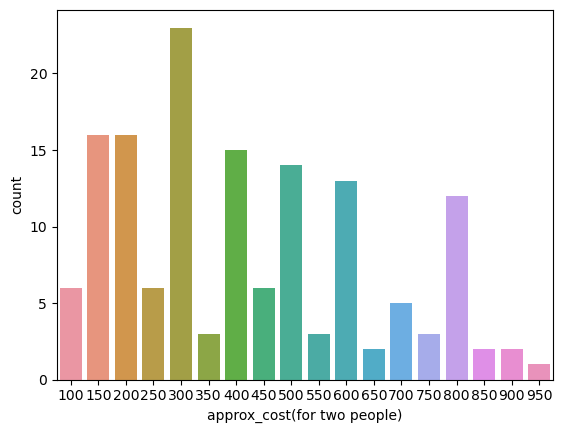

In [14]:
sns.countplot(x= CD)

## Conclusion - the majority of couple prefer restaurants with an approximate cost of 300 rupees"

### 5)Which mode receives maximum rating ?(Box Plot)

<Axes: xlabel='online_order', ylabel='rate'>

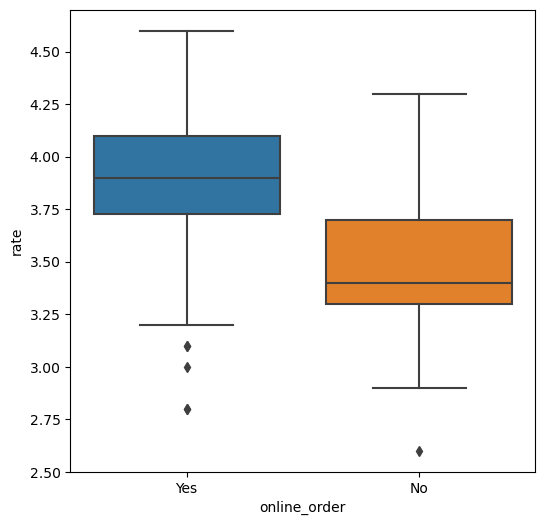

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(x= 'online_order', y = 'rate' , data = df)

## Conclusion - offline order received lower rating in comparison to online order

### 6) Which type of restaurant received more offline orders, so thta Zomato can provide customers with good offers ? (Heatmap)

In [19]:
df.head(50)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,800,Buffet
7,Onesta,Yes,Yes,4.6,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,700,other
9,Smacznego,Yes,No,4.2,504,550,Cafes


In [29]:
Pt = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
print(Pt)

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


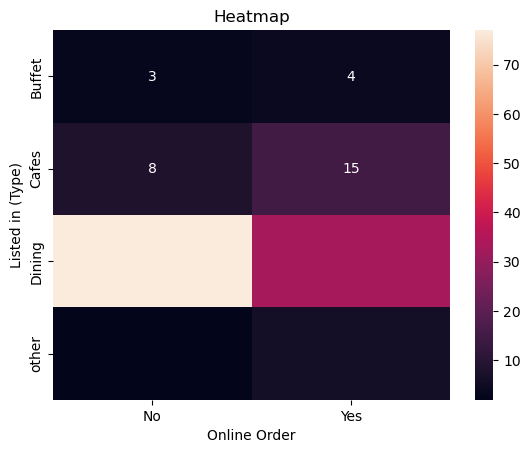

In [33]:
sns.heatmap(Pt, annot=True, fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

## Conclusion - Dining restaurant primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer orders in person at restaurants, but prefer online ordering at cafes.